<img src="img/csdms_logo.jpg">

# BMI Live!

Let's use this notebook to test our BMI as we develop it.

## Setup

Before we start, make sure you've installed the `basic-modeling-interface` package:

    $ conda install basic-modeling-interface -c csdms-stack

Also install our `bmi-live-2017` package in developer mode:

    $ python setup.py develop

Last, a pair of imports for later:

In [1]:
import os
import numpy as np
from __future__ import print_function

## Test the BMI methods

Start by importing the `BmiDiffusion` class from the **bmi-live-2018** package:

In [2]:
from bmi_live.bmi_diffusion import BmiDiffusion

Create an instance of the model's BMI.

In [3]:
x = BmiDiffusion()

What's the name of this component?

In [4]:
print(x.get_component_name())

Diffusion model


Show the input and output variables for the component:

In [5]:
print(x.get_input_var_names())
print(x.get_output_var_names())

('plate_surface__temperature',)
('plate_surface__temperature',)


Locate a sample configuration file included with the **bmi-live-2018** package:

In [6]:
from bmi_live import data_directory
cfg_file = os.path.join(data_directory, 'diffusion.yaml')
print(cfg_file)

/home/jannis/PhD/code/_other/BMI_clinic_CSDMS/bmi-live-2018/bmi_live/data/diffusion.yaml


Use the sample configuration to initialize the Diffusion model through its BMI:

In [7]:
x.initialize(cfg_file)
# x.initialize()

Check the time information for the model.

In [8]:
print('Start time:', x.get_start_time())
print('End time:', x.get_end_time())
print('Current time:', x.get_current_time())
print('Time step:', x.get_time_step())
print('Time units:', x.get_time_units())

Start time: 0.0
End time: 1.79769313486e+308
Current time: 0.0
Time step: 0.166666666667
Time units: -


Get the model's initial temperature field through the BMI:

In [9]:
temp = x.get_value('plate_surface__temperature')
#print(temp)  # flattened!
print(temp.reshape(x._model.temperature.shape))  # dimensional

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [10]:
import matplotlib.pyplot as plt
plt.imshow(temp.reshape(x._model.temperature.shape))
plt.colorbar()
plt.show()

Add a unit impulse to the initial temperature field: 

In [11]:
temp[20] = 100.0
x.set_value('plate_surface__temperature', temp)

Check that the temperature field has been updated:

In [12]:
temp = x.get_value('plate_surface__temperature')
#print(temp)
print(temp.reshape(x._model.temperature.shape))

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]]


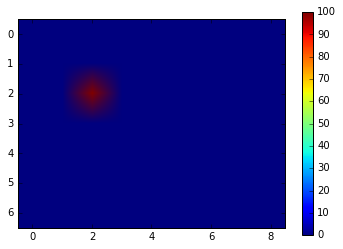

In [13]:
import matplotlib.pyplot as plt
plt.imshow(temp.reshape(x._model.temperature.shape))
plt.colorbar()
plt.show()

Next, get attributes of the grid on which the temperature variable is defined:

In [14]:
grid_id = x.get_var_grid('plate_surface__temperature')
print('Grid id:', grid_id)
grid_shape = x.get_grid_shape(grid_id)
print('Grid shape:', grid_shape)
print('Grid spacing:', x.get_grid_spacing(grid_id))
print('Grid origin:', x.get_grid_origin(grid_id))
print('Grid type:', x.get_grid_type(grid_id))

Grid id: None
Grid shape: None
Grid spacing: None
Grid origin: None
Grid type: None


Now advance the model by a single time step:

In [15]:
x.update()

View the new state of the temperature field:

In [16]:
grid_shape = (x._model.ny, x._model.nx)

In [17]:
temp = x.get_value('plate_surface__temperature')
print(temp.reshape(grid_shape))

[[  0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      3.125   0.      0.      0.      0.      0.      0.   ]
 [  0.      3.125  87.5     3.125   0.      0.      0.      0.      0.   ]
 [  0.      0.      3.125   0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.   ]]


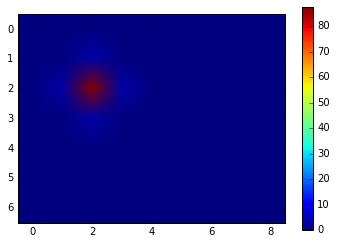

In [18]:
import matplotlib.pyplot as plt
plt.imshow(temp.reshape(grid_shape))
plt.colorbar()
plt.show()

There's diffusion!

Advance another step:

In [19]:
x.update()

View the new state of the temperature field (with help from `np.set_printoptions`):

In [20]:
temp = x.get_value('plate_surface__temperature')
np.set_printoptions(formatter={'float': '{: 6.2f}'.format})
print(temp.reshape(grid_shape))

[[  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]
 [  0.00   0.20   5.47   0.20   0.00   0.00   0.00   0.00   0.00]
 [  0.00   5.47  76.95   5.47   0.10   0.00   0.00   0.00   0.00]
 [  0.00   0.20   5.47   0.20   0.00   0.00   0.00   0.00   0.00]
 [  0.00   0.00   0.10   0.00   0.00   0.00   0.00   0.00   0.00]
 [  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]
 [  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]]


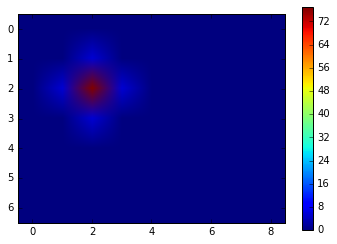

In [21]:
import matplotlib.pyplot as plt
plt.imshow(temp.reshape(grid_shape))
plt.colorbar()
plt.show()

Advance the model to some distant time:

In [22]:
distant_time = 5.0
x.update_until(distant_time)

View the new state of the temperature field:

In [23]:
temp = x.get_value('plate_surface__temperature')
print(temp.reshape(grid_shape))

[[  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]
 [  0.00   3.67   5.90   4.17   1.76   0.51   0.11   0.02   0.00]
 [  0.00   5.90   9.46   6.71   2.86   0.84   0.18   0.03   0.00]
 [  0.00   4.17   6.71   4.72   1.98   0.57   0.12   0.02   0.00]
 [  0.00   1.76   2.85   1.98   0.81   0.23   0.05   0.01   0.00]
 [  0.00   0.49   0.81   0.55   0.22   0.06   0.01   0.00   0.00]
 [  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]]


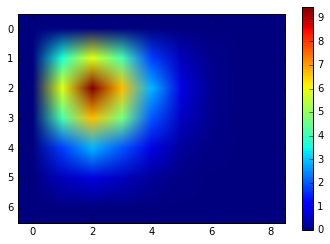

In [24]:
import matplotlib.pyplot as plt
plt.imshow(temp.reshape(grid_shape))
plt.colorbar()
plt.show()

Finalize the model:

In [25]:
x.finalize()